In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Define a simple function that we will use $ y = 3x^2 - 4x + 5 $

In [2]:
def f(x):
    return 3*x**2 - 4*x +5

In [3]:
func = f(3.0)

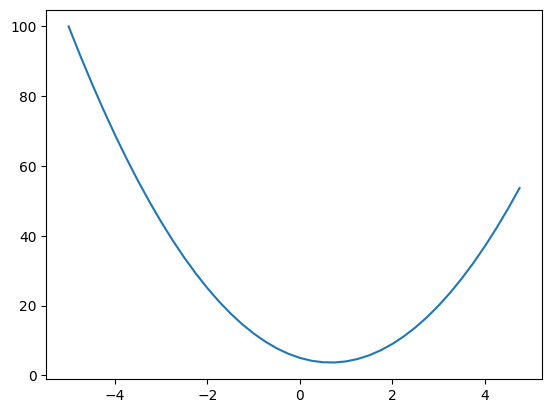

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

Explanation of how a slight nudge in x affetcts y 

In [5]:
h = 0.001
x = 2/3
"""how the function responded to the slight nudge
    f(x +h)"""

# By How much the change in h affects the slop, numerical approximation of the slop
(f(x+h)-f(x))/h

0.0029999999995311555

In [14]:
# A bit more complex case
a = 2.0
b = -3.0
c = 10.0
d = a*b+c
print(d)

4.0


The derivative of d in respect to a,b and c

In [15]:
h = 0.0001

#inputs
a = 2.0
b = -3.0
c = 10.0


d1 = a*b + c
c += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)

print('slope', (d2 -d1)/h)



d1 4.0
d2 4.0001
slope 0.9999999999976694


In [258]:
# Takes a scaler value that it tracks
class Value:
    def __init__(self,data, _children=(), _op='', label= ''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda : None
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    # reper function to retuen the string.. provides a way to print a human readadble string
    def __repr__(self):
        return f"Value(data={self.data}"
    #a = Value(2.0)
    
    # Addition operand for values being tracked
    def __add__(self,other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad   
        out._backward = _backward
        
        return out
    # Multiply
    def __mul__(self,other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        
        return out

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data ** other, (self,), f'**{other}')

        def _backward():
            self.grad += other * (self.data ** (other -1)) * out.grad
        out._backward = _backward
        return out
    
    def __rmul__(self, other):
        return self * other

    def __truediv__ (self, other):
        return self * other**-1

    def __neg__(self):
        return self * -1

    def __sub__(self, other):
        return self + (-other)
        
    def tanh (self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward ():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward

        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ) , 'exp')

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward

        return out

    def backward(self):

        topo =[]
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topo):
            node._backward()
        
    

    






In [ ]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd' 
f = Value(-2.0, label ='f')
L = d*f; L.label = 'L'
L

In [259]:
a = Value(2.0)

a.exp()


Value(data=7.38905609893065

In [20]:
d._prev

{Value(data=-6.0, Value(data=10.0}

In [21]:
from graphviz import Digraph

def trace(root):
    #builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        nodes.add(v)
        for child in v._prev:
            edges.add((child,v))
            build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad ), shape='record')
        if n._op:
        #if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
        # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n22
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot
        

Visualise what the operations are resulting to outputs

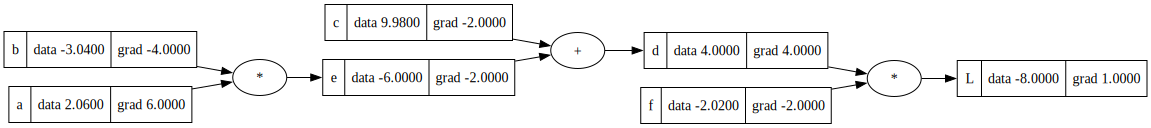

In [47]:
draw_dot(L)

In [48]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad


e = a*b; 
d = e + c
L = d*f
forw = L.data

print(forw)

-6.998016000000002


What is dL/dd

$L = d*f$

$dL/dd = ?= f$

$(f(x+h)-f(x))/(h)$

$(d+h)*f - d*f)/h$

$(d*f+h*f) - d*f)/h$

$(h*f)/h$

$f$

What is? dL/df
$dL/df = ?= d$


$(f(x+h)-(f(x))/(h)$

$(f(f+h)*d-(f(f*d))/(h) $

$(f*d + h*d) - (f*d))/(h)$

$(h*d)/(h)$

$d$

What is dL/dc

$dL/dc = ?$ = dL/de

$d = c + e$

$dL/dc = dd/dc * dL/dd $

$(f(x+h)-f(x)/(h)$

$(c+h)+e - e+c)/h$

$(c-c+e-e+h)/h$

$(h)/h$

$1$

$dL/dc = dd/dc * dL/dd = ( 1 *  -2) $

What is dL/db

$ dL/db = de/db * de/dd * dL/dd $

de/db =

$ e = b * a $

$ (f(x+h) - f(x))/h  $

$ (b+h)a - a*b) h$

$ b*a + h*a - (a*b)/h$

$ (h*a)*(h)^-1 $

$ = a $

$ dL/db = 2 * 1 * - 2 = -4 $


In [44]:
a.grad = 6.0
b.grad = -4.0

In [43]:
def lol():

    h = 0.001

    
    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd' 
    f = Value(-2.0, label ='f')
    L = d*f; L.label = 'L'
    L1 = L.data

    a = Value(2.0, label = 'a')
    a.data += h
    e = a*b; e.label = 'e'
    
    d = e + c ; d.label = 'd' 
    f = Value(-2.0 , label ='f')
    L = d*f; L.label = 'L'
    L2 = L.data 

    print((L2 -L1)/h)

lol()

    



6.000000000000227


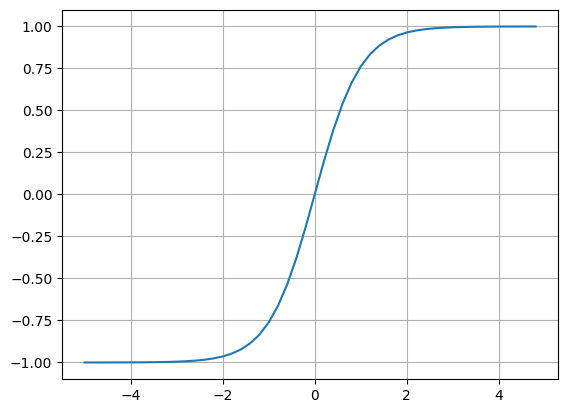

In [50]:
plt.plot(np.arange(-5,5,0.2) , np.tanh(np.arange(-5,5,0.2))); plt.grid();

In [64]:
o.grad = 1.0

In [230]:
# inputs x1,x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

#weights w1,w2
w1 = Value(-3.0, label ='w1')
w2 = Value(1.0, label = 'w2')

#bias of the neuron 
b = Value(6.8813735870195432, label='b')

# x1w1 + x2w2 +b 
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label ='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x2w2 + x1w1'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()


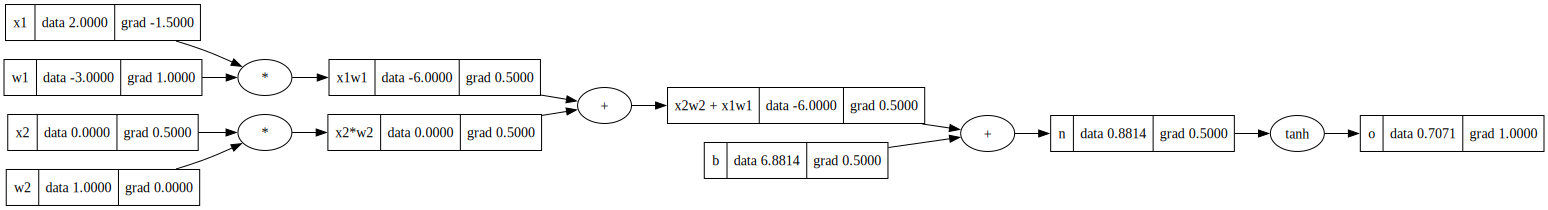

In [231]:
draw_dot(o)

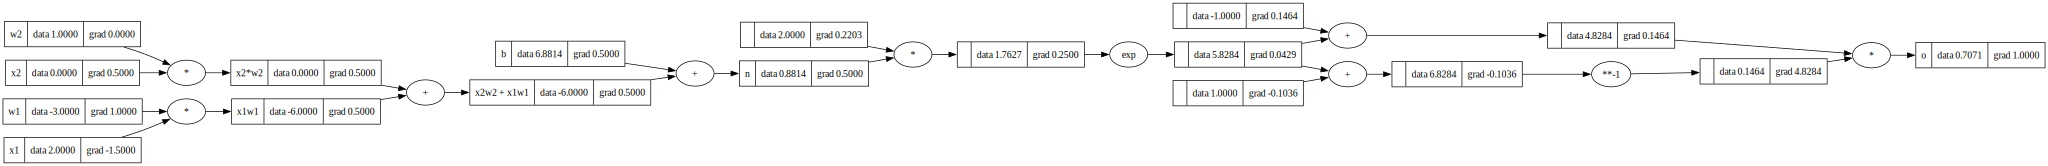

In [263]:
# inputs x1,x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')

#weights w1,w2
w1 = Value(-3.0, label ='w1')
w2 = Value(1.0, label = 'w2')

#bias of the neuron 
b = Value(6.8813735870195432, label='b')

# x1w1 + x2w2 +b 
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label ='x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x2w2 + x1w1'
n = x1w1x2w2 + b; n.label = 'n'

# ---
e = (2*n).exp()
o = (e-1)/(e+1)
#---
o.label = 'o'
o.backward()
draw_dot(o)


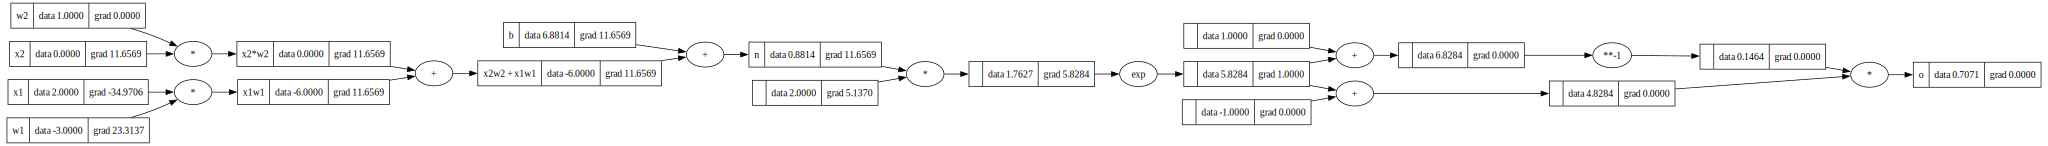

In [170]:
# Topological Sort
topo =[]
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data=1.0,
 Value(data=0.0,
 Value(data=0.0,
 Value(data=-3.0,
 Value(data=2.0,
 Value(data=-6.0,
 Value(data=-6.0,
 Value(data=6.881373587019543,
 Value(data=0.8813735870195432,
 Value(data=0.7071067811865476]

In [158]:
o.grad = 1.0

In [159]:

o._backward()


In [160]:
n._backward()

In [161]:
x1w1x2w2._backward()

In [163]:
x2w2._backward()
x1w1._backward()

Manual Calculation

In [101]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

In [103]:
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

In [80]:
x1w1.grad = 0.5
x2w2.grad = 0.5

In [77]:
b.grad = 0.5
x1w1x2w2.grad = 0.5

In [82]:
n.grad = 0.5

In [137]:
o.grad = 1.0

In [136]:
1 -o.data **2

0.4999999999999999

$ o = tanh (n)$

$do/dn = 1 - o^2$

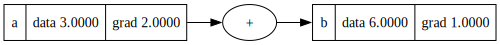

In [200]:
a = Value(3.0, label='a')
b = a + a; b.label= 'b'
b.backward()
draw_dot(b)

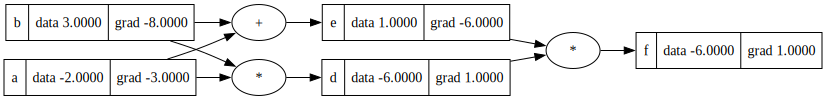

In [202]:
a = Value(-2.0, label = 'a')
b = Value(3.0, label = 'b')
d = a * b; d.label = 'd'
e = a + b; e.label = 'e'
f = d * e; f.label = 'f'

f.backward()
draw_dot(f)

In [270]:
import torch
x1 = torch.Tensor([2.0]).double()      ; x1.requires_grad = True
w1 = torch.Tensor([-3.0]).double()      ; w1.requires_grad = True
x2 = torch.Tensor([0.0]).double()      ; x2.requires_grad = True
w2 = torch.Tensor([1.0]).double()      ; w2.requires_grad = True


b = torch.Tensor([6.8813735870195432]).double() ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('------')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
------
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [297]:
import random
class Neuron:
    
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self, x):
        # w*x+b
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        
        out = act.tanh()
        return out

class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range (nout)]
    def __call__ (self, x):
        outs = [n(x) for n in self.neurons]
        return outs

class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
    
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x[0] if len(x) == 1 else x  # Return single Value if only one output

x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)
    


Value(data=0.5462089300690077

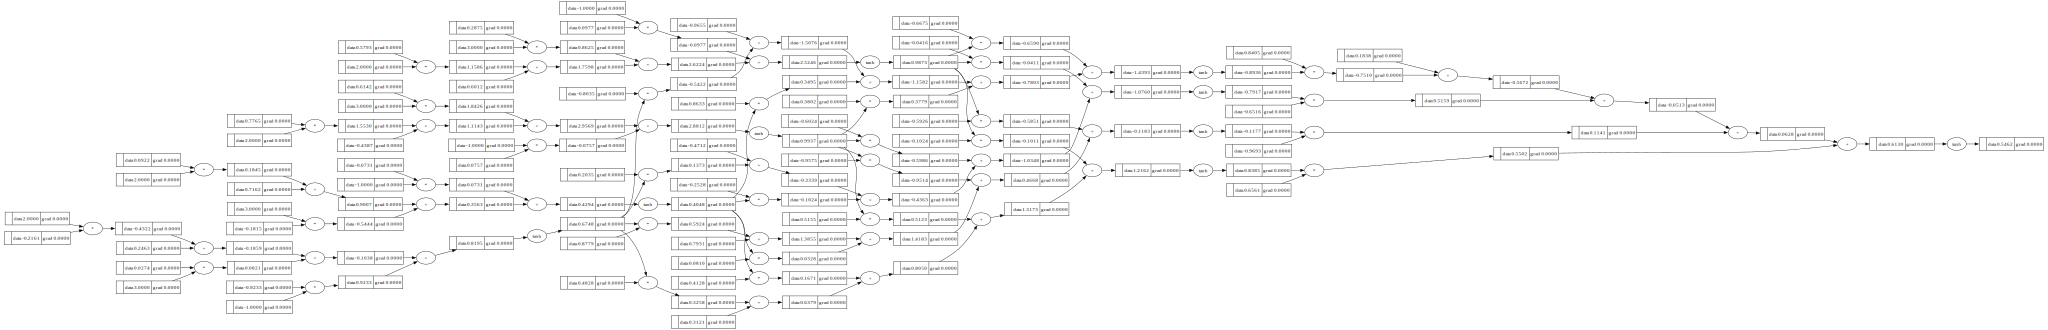

In [298]:
draw_dot(n(x))

In [ ]:
xs = [
    [2.0, 3.0